# **Proyek Akhir : Membuat Model Sistem Rekomendasi**

## **Dataset Porduk Amazon**

Nama : Mohammad Nurdin Prastya Hermansah

Email : mohammadnurdin2001@gmail.com

username : 2001nurdin

## **Import library**

In [169]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.applications.resnet50 import preprocess_input, ResNet50
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

sns.set_theme(style="ticks")
pd.set_option('display.max_colwidth', 50)

## **Data Gathering**

In [2]:
# upload token kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadprastya23","key":"8d6dfc862cfa07ebdda3b4bc549efc2b"}'}

In [3]:
# Set Up Kaggle Credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# dwonload data
!kaggle datasets download -d karkavelrajaj/amazon-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/1.95M [00:00<?, ?B/s]
100% 1.95M/1.95M [00:00<00:00, 337MB/s]


In [5]:
# unzip data
!unzip amazon-sales-dataset.zip

Archive:  amazon-sales-dataset.zip
  inflating: amazon.csv              


## **Data Understanding**

### Data Loading

In [170]:
df = pd.read_csv('amazon.csv')
pd.set_option('display.max_columns', None)
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

Output kode di atas memberikan informasi sebagai berikut:

- Terdapat 1465 baris dalam dataset.
- Terdapat 16 kolom yaitu: product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link.

## **Data Preparation**

### Informasi dataset

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Dari output terlihat bahwa sebagian besar dari kolom tersebut merupakan objek, ini informasi yang kurang tepat dikarenakan beberapa kolom yang seharusnya bernilai bukan objek / string seperti pada kolom `discounted_price`, `actual_price`, `discount_percentage`, `rating`, dan `rating_count`.

**Mengubah data kolom yang dengan tipe data yang  seharusnya**

In [172]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64') / 100


### Cek Missing value

In [173]:
# cek missing value
print(df.isna().sum())
df.loc[df.rating_count.isnull(),['rating_count']]

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


rating_count
282          NaN
324          NaN

In [174]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['rating_count'], inplace=True)
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [175]:
# Finding unusual string in rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
4.8      3
5.0      2
3.2      2
2.8      2
3.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

Terdapat nilai yang aneh di antara rating 2.0 dengan 2.3

In [176]:
# The rating column has a value with an incorrect character, so we will exclude
# the row to obtain a clean dataset.
count = df['rating'].str.contains('\|').sum()
print(f"Total rows containing '|' on 'rating': {count}")
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].str.contains('\|').sum()
print(f"Total rows containing '|' on 'rating': {count}")

Total rows containing '|' on 'rating': 1
Total rows containing '|' on 'rating': 0


In [177]:
df['rating'] = df['rating'].astype(str).str.replace(',','').astype('float64')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype('float64')

<ipython-input-177-31d86367a939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(str).str.replace(',','').astype('float64')
<ipython-input-177-31d86367a939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype('float64')


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

### Cek duplikasi data

In [179]:
# cek duplikasi data
print('Duplikasi data ada: ', df.duplicated().sum())

Duplikasi data ada:  0


tidak ada data yang duplikat

### Rating Weight

Membuat `rating_weighted` akan menguntungkan karena juga melibatkan berapa orang yang memberikan rating tersebut. Hal ini dapat membantu mengidentifikasi produk dengan kepuasan pelanggan tinggi dan banyak penilaian positif dibandingkan dengan produk dengan peringkat rata-rata tinggi tetapi sedikit penilai.

In [180]:
# Mengalikan rating dengan jumlah rating untuk mendapatkan bobot rating
df['rating_weighted'] = df['rating'] * df['rating_count']

# Menampilkan kolom rating_weighted dari dataframe
df.rating_weighted

<ipython-input-180-d352906ceecf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_weighted'] = df['rating'] * df['rating_count']


0        101929.8
1        175976.0
2         30919.2
3        396324.6
4         71001.0
5         96996.9
6         62270.8
7        130767.3
8        754702.2
9        175976.0
10        57581.3
11       396324.6
12      1878681.2
13         9500.4
14        19548.8
15        82530.8
16       137928.0
17       175976.0
18        53484.5
19        51496.8
20         3667.5
21        40559.4
22        70085.7
23        37512.0
24        20222.9
25        51042.6
26       146575.8
27        11064.0
28          809.6
29        89655.0
30       337392.0
31         7736.0
32         4188.2
33         1526.5
34         4192.5
35        96996.9
36        59628.8
37         2304.0
38        30651.6
39         1940.4
40       484591.5
41       116749.3
42       101929.8
43        51999.9
44        37512.0
45        32313.6
46        33337.1
47      1878681.2
48         1774.8
49       388899.0
50       109032.0
51       388899.0
52        35208.4
53        16812.6
54         1287.4
55        10952.0
56       754702.2
57       146575.8
58         2755.2
59        30375.2
60         8143.7
61        30568.7
62         5252.0
63       124933.2
64       189999.6
65      1878681.2
66         1845.0
67         1965.1
68        11453.4
69        86227.9
70          670.5
71          861.0
72       189999.6
73        30928.0
74         7298.0
75         2468.2
76         5692.0
77         1631.8
78         2090.4
79          128.0
80       101929.8
81        37512.0
82         3066.8
83       126680.4
84        44419.2
85        30651.6
86        20222.9
87        30568.7
88          571.5
89       101929.8
90        36482.4
91       146575.8
92       396324.6
93         1742.5
94        27967.8
95         7314.9
96         4100.2
97         4058.9
98       100890.0
99         4284.5
100       17823.5
101       28152.1
102        6352.0
103      137928.0
104       55104.0
105       12065.8
106      101929.8
107        3293.8
108       15424.1
109       96996.9
110       10582.1
111       89655.0
112        4450.5
113        7298.0
114        2272.5
115        7039.7
116        2124.0
117        3923.5
118        5252.0
119         501.6
120        8584.4
121         136.9
122        2545.6
123        5161.9
124      189999.6
125      117415.8
126       55190.5
127        5329.8
128        1192.8
129      305967.2
130       20222.9
131       12065.8
132       13180.0
133         315.9
134      177664.2
135        5916.8
136        4192.5
137       16854.4
138        7608.9
139       89655.0
140       11008.5
141      109032.0
142         912.0
143      754706.4
144       25569.6
145        5117.1
146       24714.0
147        3859.8
148      126096.6
149        1625.4
150         865.1
151        4188.2
152       70085.7
153      130767.3
154       15782.8
155          51.6
156        8584.4
157       40872.0
158          98.4
159         990.6
160       14260.0
161       26896.5
162       30928.0
163         222.3
164        2596.5
165        4652.7
166       55104.0
167        1372.0
168        6927.3
169       26232.0
170      101943.6
171       20222.9
172        5692.0
173       11399.3
174          25.0
175        2264.4
176       37512.0
177       11008.5
178       37512.0
179        1900.8
180        1189.4
181       12123.7
182       27617.6
183       59628.8
184       23439.3
185       46917.3
186       59628.8
187       12065.8
188        1365.0
189      126096.6
190       16812.6
191      733149.7
192       30568.7
193        1813.0
194        2013.1
195         237.9
196       37512.0
197      137928.0
198       32199.2
199        3234.9
200        1750.1
201        9116.2
202       11616.0
203        3356.0
204      193837.6
205       12924.0
206         268.8
207       32424.6
208        8321.3
209        1220.4
210         108.0
211         689.5
212      337396.5
213       36048.6
214        3526.4
215         418.0
216       27687.3
217        5319.1
218       83036.8
219        1388.4
220      101929.8
221        1615.0
222 

## **Univariate Exploratory Data Analysis**

### Eksplorasi Collaborative Filtering

collaborative filtering (CF) bekerja dengan prinsip:

1. User-based CF: mencari user lain yang punya pola rating mirip dengan user target, lalu merekomendasikan produk yang disukai oleh user-user tersebut.

2. Item-based CF: mencari produk yang mendapat rating mirip dari user yang sama, lalu merekomendasikan produk serupa.

#### Eksplorasi UserId Variabel

Tujuan
1. Mengetahui seberapa aktif pengguna
2. Melihat distribusi interaksi per user
3. Menemukan user yang terlalu pasif atau terlalu aktif



In [181]:
# jumlah user id
num_users = df['user_id'].nunique()
print(f"Jumlah user unik: {num_users}")

Jumlah user unik: 1191


In [182]:
# jumlah interaksi user
user_activity = df['user_id'].value_counts()
user_activity.describe()

count    1191.000000
mean        1.227540
std         0.773151
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: count, dtype: float64

Interpretasi:

Mayoritas user_id hanya muncul sekali (karena Q1, median, dan Q3 semuanya = 1).Tapi, ada sebagian kecil user_id yang muncul berkali-kali, bahkan hingga 10 kali. Rata-rata user muncul 1,23 kali, artinya memang sebagian besar hanya 1 kali tapi ada outlier yang muncul lebih sering.

In [183]:
# user paling aktif dan pasif
print("Top 5 user paling aktif:")
print(user_activity.head())

print("\nTop 5 user paling pasif:")
print(user_activity.tail())

Top 5 user paling aktif:
user_id
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q    10
AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ     8
AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQOHDBQLVDJTQ,AG7EZVSAXIVGMNDLSA55K7URQCJA,AGGF75HIEMB67OU7J3RDALBSUKQQ,AHY5CI4SU6JBYPIZ5RLAGO6W3F4A,AE4KODNBVTDCZWZO4HZM4GTRERPA,AH6HFHSYOY2OHMODD7244DHG7FUQ,AHRW5JERWYAJCZO65PDKZSOEPR6Q     8
AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ     7
AEWAZDZZJLQUYVO

#### Eksplorasi ProductId Variabel

Tujuan
1. Mengetahui item mana yang paling sering diakses
2. Menemukan item yang jarang atau tidak pernah diinteraksi
3. Cek apakah item tertentu mendominasi interaksi



In [184]:
# jumlah produk id
num_produk = df['product_id'].nunique()
print(f"Jumlah produk: {num_produk}")

Jumlah produk: 1348


In [185]:
# jumlah interaksi produk
produk = df['product_id'].value_counts()
produk.describe()

count    1348.000000
mean        1.084570
std         0.331874
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: count, dtype: float64

Interpretasi:

- Sebagian besar produk (lebih dari 75%) hanya muncul 1 kali.
- Hanya sedikit produk yang muncul lebih dari 1 kali.
- Produk yang paling sering muncul hanya 3 kali, jadi tidak ada yang terlalu dominan.
- Dengan rata-rata 1.08 dan std 0.33, ini menunjukkan dataset sangat seragam soal frekuensi produk.

In [186]:
# produk paling laku dan tidak laku
print("Top 5 produk paling laku:")
print(produk.head())

print("\nTop 5 produk paling tidak laku:")
print(produk.tail())

Top 5 produk paling laku:
product_id
B08DDRGWTJ    3
B08WRWPM22    3
B08CF3D7QR    3
B082T6V3DT    3
B08Y1TFSP6    3
Name: count, dtype: int64

Top 5 produk paling tidak laku:
product_id
B09JS94MBV    1
B0B5GF6DQD    1
B0BD92GDQH    1
B0BMVWKZ8G    1
B01F262EUU    1
Name: count, dtype: int64


<ipython-input-187-3bcf4b5d979c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='interactions', y='product_id', data=top_products_df, palette='viridis')


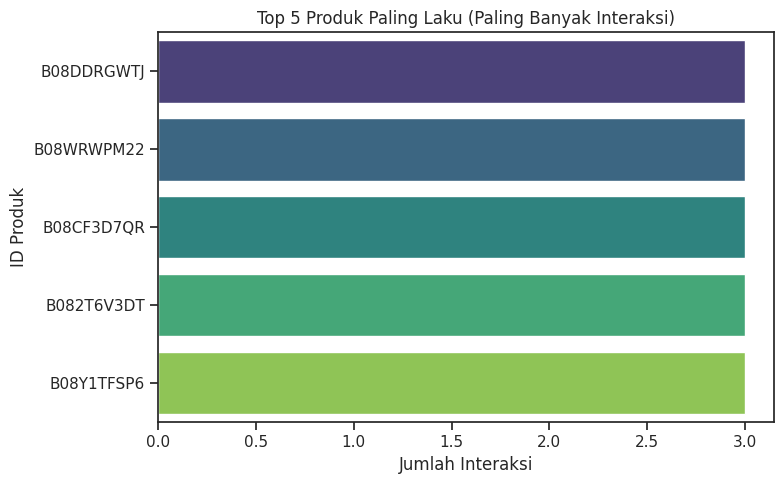

In [187]:
# Hitung jumlah interaksi per produk
top_products = df['product_id'].value_counts().head(5)

# Ubah jadi DataFrame biar bisa digabungkan dengan label
top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'interactions']

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='interactions', y='product_id', data=top_products_df, palette='viridis')
plt.title('Top 5 Produk Paling Laku (Paling Banyak Interaksi)')
plt.xlabel('Jumlah Interaksi')
plt.ylabel('ID Produk')
plt.tight_layout()
plt.show()

<ipython-input-188-8ee616009a86>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='interactions', y='product_id', data=least_popular_df, palette='magma')


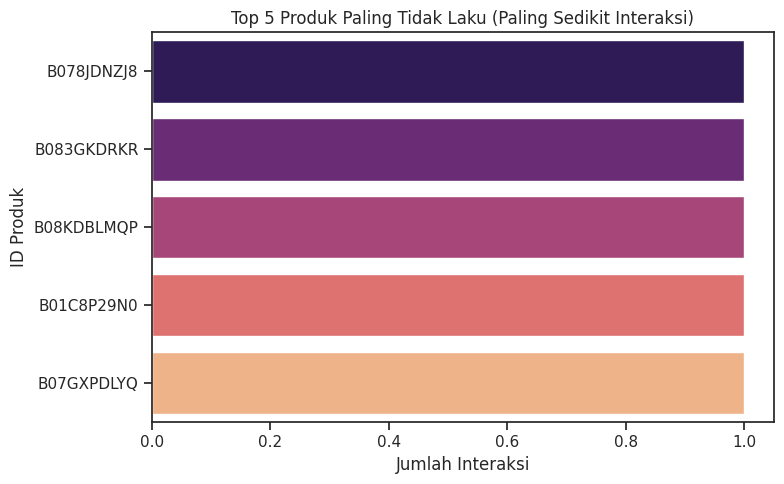

In [188]:
# Hitung jumlah interaksi per produk
product_counts = df['product_id'].value_counts()

# Ambil 5 produk dengan interaksi paling sedikit
least_popular = product_counts.nsmallest(5)

# Ubah ke DataFrame
least_popular_df = least_popular.reset_index()
least_popular_df.columns = ['product_id', 'interactions']

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='interactions', y='product_id', data=least_popular_df, palette='magma')
plt.title('Top 5 Produk Paling Tidak Laku (Paling Sedikit Interaksi)')
plt.xlabel('Jumlah Interaksi')
plt.ylabel('ID Produk')
plt.tight_layout()
plt.show()

#### Eksplorasi Rating Variabel

Tujuan:
1. Distribusi preferensi pengguna
Apakah banyak user memberikan rating tinggi terus? Atau cenderung netral?
2. Adanya bias data
Misalnya banyak rating 5 bisa menunjukkan rating bias atau user tidak objektif.
3. Nilai-nilai outlier
Untuk tahu kalau ada rating aneh (misalnya -1, 6, atau 1000).

In [189]:
# deskripsi statistik
print(df['rating'].describe())
print("\nNilai rating unik:", df['rating'].unique())

count    1462.000000
mean        4.096717
std         0.289497
min         2.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64

Nilai rating unik: [4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 2.  2.6 2.9]


Interpretasi:

- Sebagian besar rating berada antara 4.0 – 4.3, yang terlihat dari kuartil dan mean.
- Distribusinya cukup tinggi secara umum (rata-rata 4.1 dari maksimal 5.0).
- Nilai minimum 2.0 — ada produk/jasa yang dapat penilaian rendah, tapi itu cukup jarang.
- Distribusi terlihat condong ke kanan (lebih banyak rating tinggi), yang umum terjadi di ulasan produk/e-commerce.

In [190]:
# jumlah rating berdasarkan range
pd.cut(df['rating'], bins=[0,2.5,3.5,4.0,4.5,5.0]).value_counts().sort_index()

rating
(0.0, 2.5]      2
(2.5, 3.5]     65
(3.5, 4.0]    467
(4.0, 4.5]    900
(4.5, 5.0]     28
Name: count, dtype: int64

In [191]:
df[df['rating'] == df['rating'].min()]  # rating terendah

product_id                                       product_name  \
1309  B0BPJBTB3F  Khaitan ORFin Fan heater for Home and kitchen-...   

                                               category  discounted_price  \
1309  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            1299.0   

      actual_price  discount_percentage  rating  rating_count  \
1309        2495.0                 0.48     2.0           2.0   

                                          about_product  \
1309  Khaitan Orfin Fan heater for Home and kitchen|...   

                                                user_id  \
1309  AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...   

                      user_name                     review_id  \
1309  Manidipa Sengupta,Vidisha  R1OO2ED6615EX1,RR4S5JTJMCPA5   

                       review_title  \
1309  Bad quality,Amazing product..   

                                         review_content  \
1309  The heating capacity is zero .Moreover i have ...   

                                               img_link  \
1309  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  rating_weighted  
1309  https://www.amazon.in/Khaitan-ORFin-heater-Hom...              4.0

In [192]:
df[df['rating'] == df['rating'].max()]  # rating tertinggi

product_id                                       product_name  \
174  B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...   
775  B09ZHCJDP1  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   

                                              category  discounted_price  \
174  Computers&Accessories|Accessories&Peripherals|...             399.0   
775  Computers&Accessories|Accessories&Peripherals|...             499.0   

     actual_price  discount_percentage  rating  rating_count  \
174        1999.0                  0.8     5.0           5.0   
775        1000.0                  0.5     5.0          23.0   

                                         about_product  \
174  This sturdy and durable cable made of tpe and ...   
775  Reliable wireless connection up to 10m|Advance...   

                                               user_id  \
174  AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...   
775  AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...   

                                             user_name  \
174  Amazon Customer,kamal sahota,Pankaj,luvsmplcty...   
775  Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...   

                                             review_id  \
174  R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...   
775  R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...   

                                          review_title  \
174  Good,Superb quality,Good products  nice one,Wo...   
775  Very responsive and stylish mouse,Simply Aweso...   

                                        review_content  \
174  Product is good in quality. Working good with ...   
775  I really like this wireless mouse it has becam...   

                                              img_link  \
174  https://m.media-amazon.com/images/I/317OoQfs1g...   
775  https://m.media-amazon.com/images/I/31+Rg6Z46d...   

                                          product_link  rating_weighted  
174  https://www.amazon.in/Syncwire-Cable-Charging-...             25.0  
775  https://www.amazon.in/Wireless-Connection-Batt...            115.0

In [193]:
# jumlah rating per range
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

rating
2.0      1
2.3      1
2.6      1
2.8      2
2.9      1
3.0      3
3.1      4
3.2      2
3.3     16
3.4     10
3.5     26
3.6     35
3.7     42
3.8     86
3.9    123
4.0    181
4.1    244
4.2    228
4.3    230
4.4    123
4.5     75
4.6     17
4.7      6
4.8      3
5.0      2
Name: count, dtype: int64


<ipython-input-194-4fafd0e9ae3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


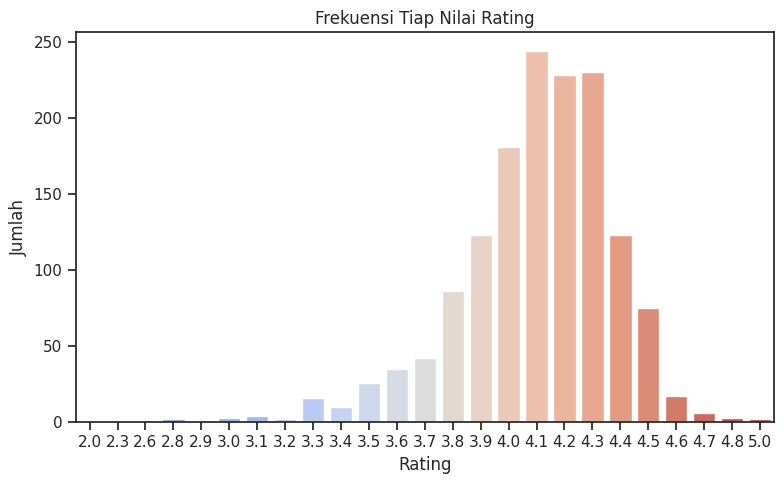

In [194]:
# visualisasi jumlah rating
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Frekuensi Tiap Nilai Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

### Eksplorasi Content-Based Filtering (CBF)

Content-Based Filtering (CBF) — sistem rekomendasi yang berdasarkan fitur produk, bukan interaksi antar pengguna. Content-based filtering merekomendasikan produk ke user berdasarkan kesamaan antara produk yang pernah disukai dengan produk lain yang punya atribut mirip.

#### Eksplorasi produk name

Tujuan:
1. Mengetahui jumlah produk
2. Menampilkan daftra nama produk
3. Kata kunci produk paling populer
4. Mengetahui produk paling laku dan tidak laku

In [195]:
# jumlah prdouk
unique_product_name = df['product_name'].nunique()
print(f"Jumlah product_name unik: {unique_product_name}")

Jumlah product_name unik: 1334


In [196]:
# Menampilkan daftar nama produk tanpa format tabel, dalam bentuk list
product_names = df['product_name'].dropna().unique()

print("Daftar Nama Produk:")
for idx, name in enumerate(product_names, 1):
    print(f"{idx}. {name}")

Daftar Nama Produk:
1. Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
2. Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
3. Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices
4. boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
5. Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)
6. pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C 

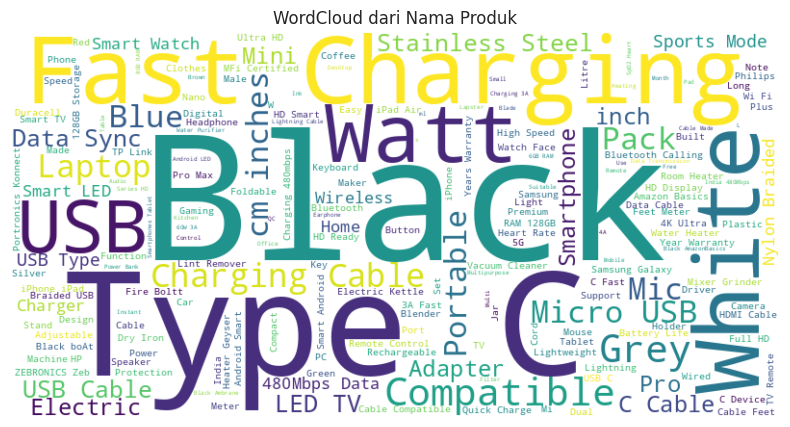

In [197]:
# kata kunci prduk paling populer
from wordcloud import WordCloud

text = " ".join(df['product_name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Nama Produk')
plt.show()

In [198]:
# Menghitung jumlah rating per produk
product_ratings = df.groupby('product_name')['rating'].count()

# Produk dengan rating terbanyak (Paling Laku)
top_selling_products = product_ratings.sort_values(ascending=False).head(10)

print("Produk Paling Laku:")
for idx, (product, count) in enumerate(top_selling_products.items(), 1):
    print(f"{idx}. {product} - {count} rating(s)")

Produk Paling Laku:
1. Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution - 5 rating(s)
2. Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating - 4 rating(s)
3. Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black - 3 rating(s)
4. Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White) - 3 rating(s)
5. Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black) - 3 rating(s)
6. Fire-Boltt Visionary 1.78" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rat

In [199]:
# Produk dengan rata-rata rating rendah (misalnya di bawah 3)
low_rated_products = df.groupby('product_name')['rating'].mean()
low_rated_products = low_rated_products[low_rated_products < 3]

print("Produk dengan Rating Rendah:")
for idx, (product, rating) in enumerate(low_rated_products.items(), 1):
    print(f"{idx}. {product} - {rating:.2f} rating")

Produk dengan Rating Rendah:
1. Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging - 2.60 rating
2. IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1 - 2.90 rating
3. Khaitan ORFin Fan heater for Home and kitchen-K0 2215 - 2.00 rating
4. MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED) - 2.80 rating
5. Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink) - 2.30 rating
6. SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black) - 2.80 rating


#### Eksplorasi Category Variabel

Tujuan:
1. Cek jumlah kategori
2. Untuk mengetahui main kategori dan sub kategori
3. Untuk mengetahui kategori paling populer
4. kategori produk dengan rating tertinggi

In [200]:
# jumlah kategori
unique_categories = df['category'].nunique()
print(f"Jumlah kategori unik: {unique_categories}")

Jumlah kategori unik: 211


In [201]:
# pisahkan kategori jadi main dan sub

# Sub category in the last section
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]

# Main category is the general category
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
df[['main_category','sub_category']]

main_category                             sub_category
0     Computers&Accessories                                USBCables
1     Computers&Accessories                                USBCables
2     Computers&Accessories                                USBCables
3     Computers&Accessories                                USBCables
4     Computers&Accessories                                USBCables
5     Computers&Accessories                                USBCables
6     Computers&Accessories                                USBCables
7     Computers&Accessories                                USBCables
8     Computers&Accessories                      WirelessUSBAdapters
9     Computers&Accessories                                USBCables
10    Computers&Accessories                                USBCables
11    Computers&Accessories                                USBCables
12              Electronics                               HDMICables
13    Computers&Accessories                                USBCables
14    Computers&Accessories                                USBCables
15    Computers&Accessories                                USBCables
16              Electronics                         SmartTelevisions
17    Computers&Accessories                                USBCables
18    Computers&Accessories                                USBCables
19              Electronics                         SmartTelevisions
20    Computers&Accessories                                USBCables
21              Electronics                               HDMICables
22              Electronics                         SmartTelevisions
23    Computers&Accessories                                USBCables
24              Electronics                         SmartTelevisions
25              Electronics                               HDMICables
26              Electronics                         SmartTelevisions
27    Computers&Accessories                                USBCables
28    Computers&Accessories                                USBCables
29    Computers&Accessories                                USBCables
30    Computers&Accessories                                USBCables
31    Computers&Accessories                                USBCables
32    Computers&Accessories                                USBCables
33    Computers&Accessories                                USBCables
34    Computers&Accessories                                USBCables
35    Computers&Accessories                                USBCables
36    Computers&Accessories                                USBCables
37    Computers&Accessories                                USBCables
38              Electronics                         SmartTelevisions
39    Computers&Accessories                                USBCables
40    Computers&Accessories                                USBCables
41              Electronics                         SmartTelevisions
42    Computers&Accessories                                USBCables
43    Computers&Accessories                      WirelessUSBAdapters
44    Computers&Accessories                                USBCables
45    Computers&Accessories                                USBCables
46    Computers&Accessories                      WirelessUSBAdapters
47              Electronics                               HDMICables
48              Electronics                           RemoteControls
49    Computers&Accessories                                USBCables
50    Computers&Accessories                      WirelessUSBAdapters
51    Computers&Accessories                                USBCables
52    Computers&Accessories                                USBCables
53              Electronics                      StandardTelevisions
54    Computers&Accessories                                USBCables
55              Electronics                           RemoteControls
56    Computers&Accessories                      WirelessUSBAdapters
57          

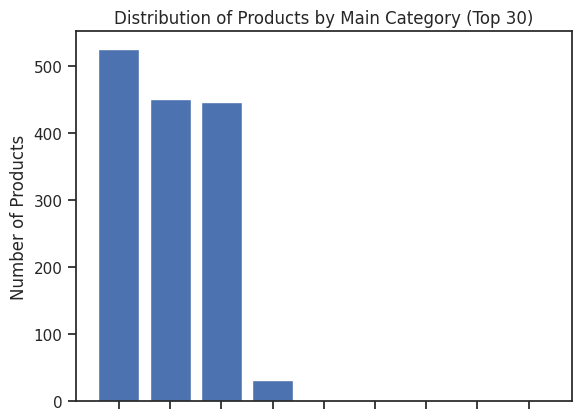

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [202]:
# distribusi kategori
# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:30] # Select only the top 30 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 main categories
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))

Dari output diatas, dapat diperoleh beberapa insight:

1. Tiga kategori teratas adalah Electronics, Computer & Accessories, dan Home & Kitchen. Hal ini memperlihatkan barang-barang tersebut adalah yang terpopuler di antara pelanggan.
2. Jumlah produk di main categories lainnya cukup sedikit, menunjukkan bahwa kategori tersebut tidak sepopuler tiga kategori teratas.
3. Office Product, Musical Instruments, Home Improvement, Toys & Games, Car & Motorbike dan Health & Personal Care memiliki jumlah produk yang sedikit yang berarti permintaan pada kategori tersebut juga sedikit.
4. Secara keseluruhan, data ini dapat membantu pemahaman bisnis mengenai tren pasar dan mengenali peluang menguntungkan untuk perkembangan di kategori tertentu.

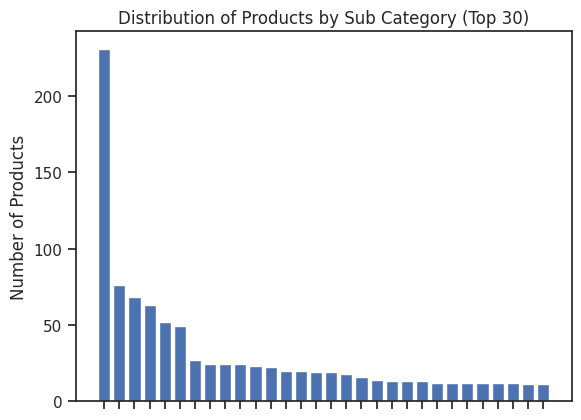

Top 30 sub categories:
          Sub Category  Number of Products
             USBCables                 231
          SmartWatches                  76
           Smartphones                  68
      SmartTelevisions                  63
                In-Ear                  52
        RemoteControls                  49
         MixerGrinders                  27
                  Mice                  24
            HDMICables                  24
              DryIrons                  24
   InstantWaterHeaters                  23
           LintShavers                  22
            FanHeaters                  20
       ElectricHeaters                  20
          HandBlenders                  19
       ElectricKettles                  19
   WirelessUSBAdapters                  18
          WallChargers                  16
              Lapdesks                  14
               MicroSD                  13
        LaundryBaskets                  13
    Kettle&ToasterSets         

In [203]:
# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30] # Select only the top 30 last categories.
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(range(len(sub_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 sub categories
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index=False))

Dari output di atas dapat diperoleh beberapa insight sebagai berikut:

1. Enam subkategori teratas adalah USB Cabels, Smartwatches, Smartphones, SmartTelevisions, In Ear, dan RemoteControls. Subkategori tersebut merupakan yang terpopuler sehingga bisnis mungkin akan berfokus pada produk-produk tersebut.
2. Subkategori terpopuler lainnya ada MixerGrinders, HDMICables, DryIrons, Mice, dan InstantWaterHeaters. Subkategori tersebut kurang populer jika dibandingkan dengan enam teratas, namun masih diminati dan ada kebutuhan dengan produk tersebut.
3. Data di atas memperlihatkan keanekaramanan subkategori di 30 teratas meliputi peralatan dapur, barang elektronik rumah, dan aksesoris pribadi. INi memperlihatkan pentingnya untuk menyediakan produk-produk yang bervariasi untuk kebutuhan pelanggan yang berbeda-beda.
4. Secara keseluruhan data tersebut membantu bisnis mengenali subkategori yang populer dan mengatur tawaran produk untuk menjangkau permintaan pelanggan. Dengan fokus pada subkategori tersebut akan membantu meningkatkan penjualan.

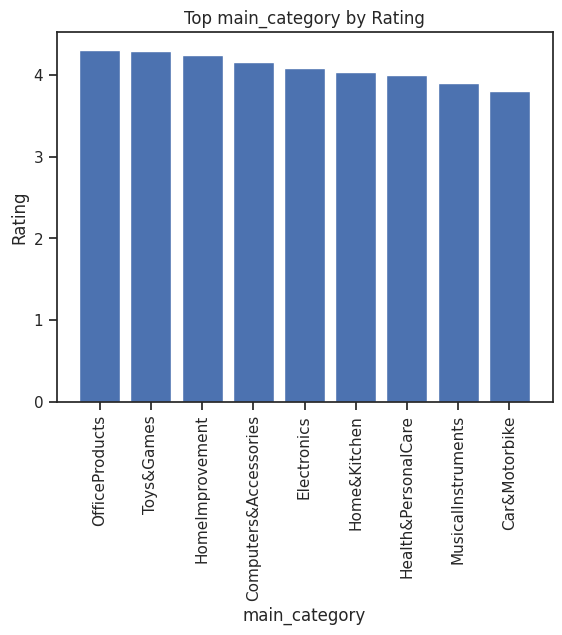

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [204]:
# kategori produk dengan rating tertinggi
# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

Dari output di atas dapat diperoleh informasi:

1. Dapat dilihat kategori utama diurutkan berdasarkan rating rata-ratanya.
Kategori dengan rating tertinggi adalah OfficeProducts, Toys&Games, dan HomeImprovement dengan rating di atas 4. Ini menyatakan bahwa pelanggan secara umum suka dengan produk yang ditawarkan pada kategori tersebut.
2. Di sisi lain, kategori utama dengan rating rendah ada Car&Motorbike, MusicalInstruments, dan Health&PersonalCare dengan rating di bawah 4. Ini berarti perlu adanya perbaikan untuk dapat memenuhi ekspetasi pelanggan.

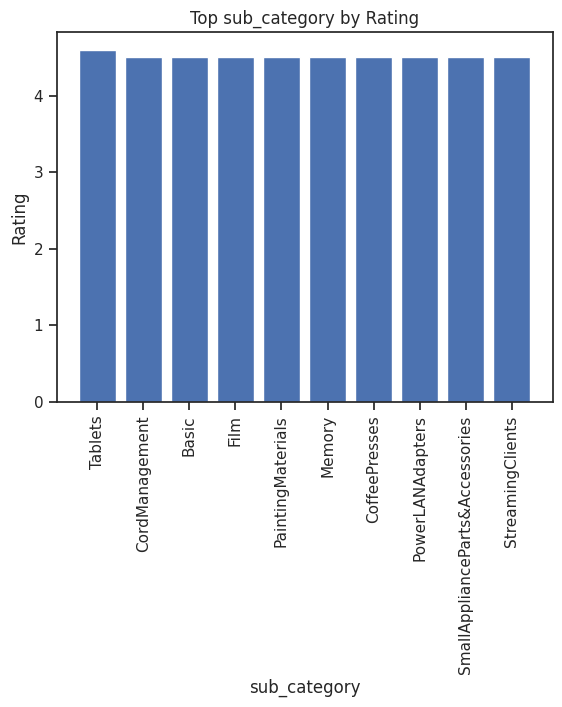

                                sub_category    rating
0                                    Tablets  4.600000
1                             CordManagement  4.500000
2                                      Basic  4.500000
3                                       Film  4.500000
4                          PaintingMaterials  4.500000
5                                     Memory  4.500000
6                              CoffeePresses  4.500000
7                           PowerLANAdapters  4.500000
8            SmallApplianceParts&Accessories  4.500000
9                           StreamingClients  4.500000
10                           SurgeProtectors  4.500000
11                                 AirFryers  4.460000
12                                Scientific  4.450000
13                                    Paints  4.433333
14                       DisposableBatteries  4.414286
15                        WireboundNotebooks  4.400000
16                             SpeakerCables  4.400000
17        

In [205]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

Berdasarkan output diatas, dapat dilihat bahwa:

1. Dari tabel dapat dilihat rating dari sub kategori dari atas hingga bawah.
Produk "tablet", merupakan subkategori teratas dengan rating 4.6 yang berarti pelanggan puas dengan pembeliannya.
Namun, subkategori terbawah seperti "Dustcovers" dan "ElectricGrinders", memiliki rating terendah,yang berarti pelanggan tidak begitu puas dengan produk tersebut.
2. Wawasan seperti ini dapat membantu bisnis fokus pada peningkatan kualitas produk mereka dan meningkatkan pengalaman pelanggan secara keseluruhan. Penting untuk melacak umpan balik pelanggan untuk mengidentifikasi area yang perlu ditingkatkan dan terus memenuhi kebutuhan dan harapan mereka.

#### Eksplorasi Price Varibel

Tujuan:
- Distribusi harga produk
- Statistik ringkasan harga
- Produk paling mahal dan paling murah
- Outlier harga (jika ada)
- Korelasi antara harga dan rating

In [206]:
# statistik ringkasan harga
price_stats = df['actual_price'].describe()
print("Statistik Ringkasan Harga:")
print(price_stats)

Statistik Ringkasan Harga:
count      1462.000000
mean       5453.087743
std       10884.467444
min          39.000000
25%         800.000000
50%        1670.000000
75%        4321.250000
max      139900.000000
Name: actual_price, dtype: float64


In [207]:
# Produk dengan harga tertinggi
most_expensive = df.sort_values('actual_price', ascending=False).head(5)
print("Produk Paling Mahal:")
print(most_expensive[['product_name', 'actual_price']])

Produk Paling Mahal:
                                           product_name  actual_price
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...      139900.0
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...       85000.0
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...       79990.0
1354  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...       75990.0
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...       74999.0


In [208]:
# Produk dengan harga terendah
cheapest = df.sort_values('actual_price', ascending=True).head(5)
print("Produk Paling Murah:")
print(cheapest[['product_name', 'actual_price']])

Produk Paling Murah:
                                          product_name  actual_price
997  Inventis 5V 1.2W Portable Flexible USB LED Lig...          39.0
975  E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...          39.0
616  Classmate Octane Neon- Blue Gel Pens(Pack of 5...          50.0
710  E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...          59.0
811  Classmate Pulse Spiral Notebook - 240 mm x 180...          75.0


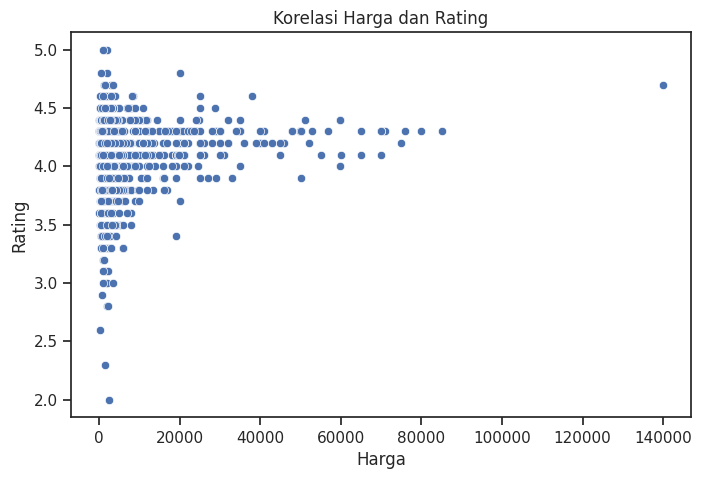

In [209]:
# korelasi harga vs rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='actual_price', y='rating')
plt.title('Korelasi Harga dan Rating')
plt.xlabel('Harga')
plt.ylabel('Rating')
plt.show()

In [210]:
# harga rata rata per katergori
avg_price_by_category = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
print("Rata-rata Harga per Kategori:")
print(avg_price_by_category)

Rata-rata Harga per Kategori:
category
Home&Kitchen|Heating,Cooling&AirQuality|AirConditioners|Split-SystemAirConditioners                                        75990.000000
Computers&Accessories|Laptops|TraditionalLaptops                                                                           59890.000000
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|RoboticVacuums                       44949.500000
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                              40132.841270
Computers&Accessories|Tablets                                                                                              37999.000000
Computers&Accessories|ExternalDevices&DataStorage|ExternalSolidStateDrives                                                 32000.000000
Home&Kitchen|Heating,Cooling&AirQuality|AirPurifiers|HEPAAirPurifiers                                                      27113.250000
Home&Kitc

In [211]:
# Produk dengan rating terbanyak tiap kategori
top_reviewed_per_category = (
    df.groupby(["category"])
    .apply(lambda x: x.nlargest(10, "rating_weighted"))
    .reset_index(drop=True)
)

top_reviewed_per_category[['main_category','sub_category', 'rating', 'rating_count', 'rating_weighted']].head(10).sort_values(by=['rating_weighted'], ascending=False).reset_index(drop=True)

<ipython-input-211-791f88fec12a>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "rating_weighted"))


main_category           sub_category  rating  rating_count  \
0  Computers&Accessories                Webcams     4.3       20398.0   
1  Computers&Accessories          PCMicrophones     3.9       14969.0   
2  Computers&Accessories                Webcams     4.1       10976.0   
3  Computers&Accessories             PCSpeakers     4.0        7352.0   
4  Computers&Accessories             PCHeadsets     3.5        7222.0   
5  Computers&Accessories             PCSpeakers     4.1        5195.0   
6  Computers&Accessories       USBtoUSBAdapters     4.3        4426.0   
7  Computers&Accessories          PCMicrophones     3.3        2804.0   
8  Computers&Accessories       USBtoUSBAdapters     4.0        1540.0   
9          Car&Motorbike  AirPurifiers&Ionizers     3.8        1118.0   

   rating_weighted  
0          87711.4  
1          58379.1  
2          45001.6  
3          29408.0  
4          25277.0  
5          21299.5  
6          19031.8  
7           9253.2  
8           6160.0  
9           4248.4

### Resume Univariate Eda

In [212]:
# copy data final
data = df.copy()

In [213]:
# cek data
data.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0                 0.43     4.0       43994.0   
2        1899.0                 0.90     3.9        7928.0   
3         699.0                 0.53     4.2       94363.0   
4         399.0                 0.61     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  rating_weighted  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...         101929.8   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...         175976.0   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...          30919.2   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...         396324.6   
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [215]:
# Hitung ringkasan utama
jumlah_user_id = data['user_id'].nunique()
jumlah_product_id = data['product_id'].nunique()
jumlah_rating = data['rating'].count()
rata_rating = data['rating'].mean()

# Hitung produk paling laku dan tidak laku
produk_rating_count = data.groupby(['product_id', 'product_name'])['rating'].count().reset_index(name='rating_count')
produk_paling_laku = produk_rating_count.sort_values(by='rating_count', ascending=False).iloc[0]
produk_tidak_laku = produk_rating_count.sort_values(by='rating_count', ascending=True).iloc[0]

# Produk paling mahal dan paling murah berdasarkan actual_price
produk_mahal = data[['product_id', 'product_name', 'actual_price']].drop_duplicates().sort_values(by='actual_price', ascending=False).iloc[0]
produk_murah = data[['product_id', 'product_name', 'actual_price']].drop_duplicates().sort_values(by='actual_price', ascending=True).iloc[0]

# Produk dengan rating bagus (rating tertinggi) dan rating jelek (rating terendah)
produk_rating_avg = data.groupby(['product_id', 'product_name'])['rating'].mean().reset_index(name='avg_rating')

produk_rating_bagus = produk_rating_avg.sort_values(by='avg_rating', ascending=False).iloc[0]
produk_rating_jelek = produk_rating_avg.sort_values(by='avg_rating', ascending=True).iloc[0]

# Hitung kategori utama (main category)
jumlah_main_kategori = data['main_category'].nunique()

# Kategori utama paling populer dan tidak populer
kategori_main_count = data.groupby('main_category')['product_id'].count().reset_index(name='product_count')
kategori_main_populer = kategori_main_count.sort_values(by='product_count', ascending=False).iloc[0]
kategori_main_tidak_populer = kategori_main_count.sort_values(by='product_count', ascending=True).iloc[0]

# Hitung kategori sub (sub category)
jumlah_sub_kategori = data['sub_category'].nunique()

# Kategori sub paling populer dan tidak populer
kategori_sub_count = data.groupby('sub_category')['product_id'].count().reset_index(name='product_count')
kategori_sub_populer = kategori_sub_count.sort_values(by='product_count', ascending=False).iloc[0]
kategori_sub_tidak_populer = kategori_sub_count.sort_values(by='product_count', ascending=True).iloc[0]

# Buat tabel ringkasan analisis
df_anl = pd.DataFrame({
    'Pertanyaan': [
        'Jumlah User Id',
        'Jumlah Product Id',
        'Jumlah Rating',
        'Rata-rata Rating',
        'Produk Paling Laku',
        'Produk Tidak Laku',
        'Produk Paling Mahal',
        'Produk Paling Murah',
        'Produk Dengan Rating Bagus',
        'Produk Dengan Rating Jelek',
        'Jumlah Main Kategori',
        'Kategori Main Paling Populer',
        'Kategori Main Tidak Populer',
        'Jumlah Sub Kategori',
        'Kategori Sub Paling Populer',
        'Kategori Sub Tidak Populer'
    ],
    'Nilai': [
        jumlah_user_id,
        jumlah_product_id,
        jumlah_rating,
        round(rata_rating, 2),
        f"{produk_paling_laku['product_name']} ({produk_paling_laku['rating_count']} rating)",
        f"{produk_tidak_laku['product_name']} ({produk_tidak_laku['rating_count']} rating)",
        f"{produk_mahal['product_name']} (Rp {produk_mahal['actual_price']:,})",
        f"{produk_murah['product_name']} (Rp {produk_murah['actual_price']:,})",
        f"{produk_rating_bagus['product_name']} (Rating: {produk_rating_bagus['avg_rating']:.2f})",
        f"{produk_rating_jelek['product_name']} (Rating: {produk_rating_jelek['avg_rating']:.2f})",
        jumlah_main_kategori,
        f"{kategori_main_populer['main_category']} ({kategori_main_populer['product_count']} produk)",
        f"{kategori_main_tidak_populer['main_category']} ({kategori_main_tidak_populer['product_count']} produk)",
        jumlah_sub_kategori,
        f"{kategori_sub_populer['sub_category']} ({kategori_sub_populer['product_count']} produk)",
        f"{kategori_sub_tidak_populer['sub_category']} ({kategori_sub_tidak_populer['product_count']} produk)"
    ]
})

# Tampilkan tabel
from IPython.display import display
display(df_anl)


Pertanyaan  \
0                 Jumlah User Id   
1              Jumlah Product Id   
2                  Jumlah Rating   
3               Rata-rata Rating   
4             Produk Paling Laku   
5              Produk Tidak Laku   
6            Produk Paling Mahal   
7            Produk Paling Murah   
8     Produk Dengan Rating Bagus   
9     Produk Dengan Rating Jelek   
10          Jumlah Main Kategori   
11  Kategori Main Paling Populer   
12   Kategori Main Tidak Populer   
13           Jumlah Sub Kategori   
14   Kategori Sub Paling Populer   
15    Kategori Sub Tidak Populer   

                                                Nilai  
0                                                1191  
1                                                1348  
2                                                1462  
3                                                 4.1  
4   Wayona Nylon Braided USB to Lightning Fast Cha...  
5   Crompton Insta Comfort Heater 2000 Watts Heat ...  
6   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...  
7   E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...  
8   Syncwire LTG to USB Cable for Fast Charging Co...  
9   Khaitan ORFin Fan heater for Home and kitchen-...  
10                                                  9  
11                           Electronics (526 produk)  
12                           Car&Motorbike (1 produk)  
13                                                207  
14                             USBCables (231 produk)  
15                               3DGlasses (1 produk)

## **Data Preprocessing**

Tujuan: supaya sistem mudah memahami dan mencocokkan produk yang relevan.

In [216]:
# ambil data
data.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0                 0.43     4.0       43994.0   
2        1899.0                 0.90     3.9        7928.0   
3         699.0                 0.53     4.2       94363.0   
4         399.0                 0.61     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  rating_weighted  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...         101929.8   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...         175976.0   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...          30919.2   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...         396324.6   
4  https://www.amazon.in/Portronics-Konnect-POR-1...

### Seleksi fitur

In [217]:
# pilih data yang akan digunakan untuk rekoemndasi baik content base filter atau colaboratif filter dan hybrid sistem rekomendasi
rekomendasi_data = data.drop(['discounted_price', 'discount_percentage', 'review_id', 'review_title',
                   'user_name', 'img_link', 'product_link'], axis=1)

rekomendasi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1462 non-null   object 
 1   product_name     1462 non-null   object 
 2   category         1462 non-null   object 
 3   actual_price     1462 non-null   float64
 4   rating           1462 non-null   float64
 5   rating_count     1462 non-null   float64
 6   about_product    1462 non-null   object 
 7   user_id          1462 non-null   object 
 8   review_content   1462 non-null   object 
 9   rating_weighted  1462 non-null   float64
 10  sub_category     1462 non-null   object 
 11  main_category    1462 non-null   object 
dtypes: float64(4), object(8)
memory usage: 148.5+ KB


In [218]:
rekomendasi_data['combined_text'] = rekomendasi_data['product_name'] + ' ' + rekomendasi_data['category'] + ' ' + rekomendasi_data['about_product'] +' '+ rekomendasi_data['review_content']
#Fill null with empty string to avoid issues
rekomendasi_data['combined_text'] = rekomendasi_data['combined_text'].fillna('')

In [219]:
# final data untuk rekomendasi
data_final = rekomendasi_data.copy()
data_final.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  actual_price  rating  \
0  Computers&Accessories|Accessories&Peripherals|...        1099.0     4.2   
1  Computers&Accessories|Accessories&Peripherals|...         349.0     4.0   
2  Computers&Accessories|Accessories&Peripherals|...        1899.0     3.9   
3  Computers&Accessories|Accessories&Peripherals|...         699.0     4.2   
4  Computers&Accessories|Accessories&Peripherals|...         399.0     4.2   

   rating_count                                      about_product  \
0       24269.0  High Compatibility : Compatible With iPhone 12...   
1       43994.0  Compatible with all Type C enabled devices, be...   
2        7928.0  【 Fast Charger& Data Sync】-With built-in safet...   
3       94363.0  The boAt Deuce USB 300 2 in 1 cable is compati...   
4       16905.0  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                      review_content  rating_weighted  \
0  Looks durable Charging is fine tooNo complains...         101929.8   
1  I ordered this cable to connect my phone to An...         175976.0   
2  Not quite durable and sturdy,https://m.media-a...          30919.2   
3  Good product,long wire,Charges good,Nice,I bou...         396324.6   
4  Bought this instead of original apple, does th...          71001.0   

  sub_category          main_category  \
0    USBCables  Computers&Accessories   
1    USBCables  Computers&Accessories   
2    USBCables  Computers&Accessories   
3    USBCables  Computers&Accessories   
4    USBCables  Computers&Accessories   

                                       combined_text  
0  Wayona Nylon Braided USB to Lightning Fast Cha...  
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...  
2  Sounce Fast Phone Charging Cable & Data Sync U...  
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...  
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...

## **Sistem Rekomendasi Model dengan Content Based Filtering**

### Seleksi fitur

In [66]:
# Final Dataset untuk Content base filtering
cbf_data = data_final[['product_id', 'product_name', 'category', 'main_category', 'sub_category', 'actual_price', 'about_product', 'combined_text']]
cbf_data.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category          main_category  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   

  sub_category  actual_price  \
0    USBCables        1099.0   
1    USBCables         349.0   
2    USBCables        1899.0   
3    USBCables         699.0   
4    USBCables         399.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                       combined_text  
0  Wayona Nylon Braided USB to Lightning Fast Cha...  
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...  
2  Sounce Fast Phone Charging Cable & Data Sync U...  
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...  
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...

### Feature Engineering

#### TF-IDF Vectorizer


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
#Instantiate TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, ngram_range=(1, 1))

vectorizer.fit(cbf_data['combined_text'])
vectorizer.get_feature_names_out()

array(['00', '000', '003', ..., '𝗳𝗼𝗿', '𝟱i', '𝟱you'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [58]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix menggunakan 'description' sebagai fitur
#Fit and transform
tfidf_matrix = vectorizer.fit_transform(cbf_data['combined_text'])
tfidf_matrix.shape

# Melihat ukuran matrix tfidf
print(tfidf_matrix.shape)

(1462, 10264)


Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Jalankan kode berikut.

In [59]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.07650424, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

#### Cosine Similarity


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix based on the tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print the shape of the cosine similarity matrix to verify
print(cosine_sim.shape)
print()

cosine_sim

(1462, 1462)



array([[1.        , 0.2086549 , 0.36301031, ..., 0.04792804, 0.07202106,
        0.00917733],
       [0.2086549 , 1.        , 0.17167792, ..., 0.01661349, 0.02681264,
        0.02333513],
       [0.36301031, 0.17167792, 1.        , ..., 0.04111945, 0.10637459,
        0.00743395],
       ...,
       [0.04792804, 0.01661349, 0.04111945, ..., 1.        , 0.12125324,
        0.04811391],
       [0.07202106, 0.02681264, 0.10637459, ..., 0.12125324, 1.        ,
        0.03085073],
       [0.00917733, 0.02333513, 0.00743395, ..., 0.04811391, 0.03085073,
        1.        ]])

In [61]:
def cbf_product_recommendations(id_product, similarity_data=cosine_sim, items=cbf_data, top_n = 10):
    index = items.index[items.product_id == id_product][0]

    sim_scores = list(enumerate(similarity_data[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    return [i[0] for i in sim_scores[1:top_n+1]]

### Mendapatkan Rekomendasi


##### **Uji coba sistem rekomendasi dengan data sample**

In [63]:
# Mengambil data product_id untuk dijadikan sample uji coba rekomendasi
sample_product_id = cbf_data['product_id'][0]
print(sample_product_id)

# Menampilkan informasi produk sample berdasarkan product_id
cbf_data.loc[cbf_data.product_id.eq(sample_product_id), ['product_id', 'product_name', 'category', 'sub_category']]

B07JW9H4J1


product_id                                       product_name  \
0    B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
369  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
614  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   

                                              category sub_category  
0    Computers&Accessories|Accessories&Peripherals|...    USBCables  
369  Computers&Accessories|Accessories&Peripherals|...    USBCables  
614  Computers&Accessories|Accessories&Peripherals|...    USBCables

In [64]:
# Mendapatkan data rekomendasi dengan Content-Based Filtering (data sample)
cbf_data.iloc[cbf_product_recommendations(sample_product_id)][['product_name', 'category', 'sub_category']]

product_name  \
614  Wayona Nylon Braided USB to Lightning Fast Cha...   
369  Wayona Nylon Braided USB to Lightning Fast Cha...   
220  Wayona Nylon Braided Usb Syncing And Charging ...   
42   Wayona Nylon Braided 3A Lightning to USB A Syn...   
89   Wayona Nylon Braided (2 Pack) Lightning Fast U...   
80   Wayona Usb Nylon Braided Data Sync And Chargin...   
106  Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...   
166  Wayona Nylon Braided Lightning USB Data Sync &...   
208  MYVN LTG to USB for Fast Charging & Data Sync ...   
78   SWAPKART Fast Charging Cable and Data Sync USB...   

                                              category sub_category  
614  Computers&Accessories|Accessories&Peripherals|...    USBCables  
369  Computers&Accessories|Accessories&Peripherals|...    USBCables  
220  Computers&Accessories|Accessories&Peripherals|...    USBCables  
42   Computers&Accessories|Accessories&Peripherals|...    USBCables  
89   Computers&Accessories|Accessories&Peripherals|...    USBCables  
80   Computers&Accessories|Accessories&Peripherals|...    USBCables  
106  Computers&Accessories|Accessories&Peripherals|...    USBCables  
166  Computers&Accessories|Accessories&Peripherals|...    USBCables  
208  Computers&Accessories|Accessories&Peripherals|...    USBCables  
78   Computers&Accessories|Accessories&Peripherals|...    USBCables

##### **Test hasil sistem rekomendasi**

###### Rekomendasi Berdasar Nama Produk

In [67]:
from IPython.display import display  # Digunakan untuk menampilkan DataFrame di Google Colab

# Ambil input nama produk
product_name_input = input("Masukkan nama produk: ")

# Mencari product_id berdasarkan nama produk
matching_products = cbf_data[cbf_data['product_name'].str.contains(product_name_input, case=False, na=False, regex=False)]

if matching_products.empty:
    print("Produk tidak ditemukan.")
else:
    sample_product_id = matching_products['product_id'].values[0]
    print(f"Product ID untuk '{product_name_input}': {sample_product_id}")

    # Menampilkan rekomendasi produk
    recommended_products = cbf_data.iloc[cbf_product_recommendations(sample_product_id)][['product_name', 'main_category', 'sub_category', 'actual_price']]

    # Menampilkan pengaturan untuk tampilan yang lebih baik
    pd.set_option('display.max_rows', None)  # Menampilkan semua baris
    pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
    pd.set_option('display.width', None)  # Menyesuaikan lebar tampilan
    pd.set_option('display.max_colwidth', None)  # Menampilkan panjang kolom penuh

    print("\nRecommended Products:")

    # Menampilkan tabel dengan menggunakan display untuk format yang rapi di Google Colab
    display(recommended_products)

Masukkan nama produk: Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices
Product ID untuk 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices': B096MSW6CT

Recommended Products:


product_name  \
623                                                     Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices   
379                                                     Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices   
78                                   SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)   
1000                                 SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)   
174              Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)   
0                             Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
614                           Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
369                           Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
42                                                                      Wayona Nylon Braided 3A Lightning to USB A Syncing and Fast Charging Data Cable for iPhone, Ipad (3 FT Pack of 1, Black)   
176   FLiX (Beetel USB to Type C PVC Data Sync & 15W(3A) TPE Fast Charging Cable, Made in India, 480Mbps Data Sync, 1 Meter Long cable for all Andriod & all Type C Devices (Black)(XCD - FPC02)   

              main_category sub_category  actual_price  
623   Computers&Accessories    USBCables         999.0  
379   Computers&Accessories    USBCables         999.0  
78    Computers&Accessories    USBCables         499.0  
1000  Computers&Accessories    USBCables         499.0  
174   Computers&Accessories    USBCables        1999.0  
0     Computers&Accessories    USBCables        1099.0  
614   Computers&Accessories    USBCables        1099.0  
369   Computers&Accessories    USBCables        1099.0  
42    Computers&Accessories    USBCables        1099.0  
176   Computers&Accessories    USBCables         299.0

###### Rekomendasi Berdasar Keyword Produk

In [69]:
from IPython.display import display  # Digunakan untuk menampilkan DataFrame di Google Colab

# Ambil input nama produk (misalnya: pengguna mengetikkan 'smartphone')
product_name_input = input("Masukkan nama produk atau kata kunci: ")

# Mencari product_id berdasarkan kata kunci yang dimasukkan pengguna (cocokkan dengan nama produk)
matching_products = cbf_data[cbf_data['product_name'].str.contains(product_name_input, case=False, na=False, regex=True)]

if matching_products.empty:
    print("Produk tidak ditemukan.")
else:
    sample_product_id = matching_products['product_id'].values[0]
    print(f"Product ID untuk produk yang cocok dengan '{product_name_input}': {sample_product_id}")

    # Menampilkan rekomendasi produk berdasarkan ID produk yang ditemukan
    recommended_products = cbf_data.iloc[cbf_product_recommendations(sample_product_id)][['product_name', 'main_category', 'sub_category', 'actual_price']]

    # Menampilkan pengaturan untuk tampilan yang lebih baik
    pd.set_option('display.max_rows', None)  # Menampilkan semua baris
    pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
    pd.set_option('display.width', None)  # Menyesuaikan lebar tampilan
    pd.set_option('display.max_colwidth', None)  # Menampilkan panjang kolom penuh

    print("\nRecommended Products:")

    # Menampilkan tabel dengan menggunakan display untuk format yang rapi di Google Colab
    display(recommended_products)

Masukkan nama produk atau kata kunci: USB 
Product ID untuk produk yang cocok dengan 'USB ': B07JW9H4J1

Recommended Products:


product_name  \
614  Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
369  Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
220                                              Wayona Nylon Braided Usb Syncing And Charging Cable Sync And Charging Cable For Iphone, Ipad (3 Ft, Black) - Pack Of 2   
42                                             Wayona Nylon Braided 3A Lightning to USB A Syncing and Fast Charging Data Cable for iPhone, Ipad (3 FT Pack of 1, Black)   
89                                         Wayona Nylon Braided (2 Pack) Lightning Fast Usb Data Cable Fast Charger Cord For Iphone, Ipad Tablet (3 Ft Pack Of 2, Grey)   
80                                                                           Wayona Usb Nylon Braided Data Sync And Charging Cable For Iphone, Ipad Tablet (Red, Black)   
106                              Wayona Nylon Braided 2M / 6Ft Fast Charge Usb To Lightning Data Sync And Charging Cable For Iphone, Ipad Tablet (6 Ft Pack Of 1, Grey)   
166                  Wayona Nylon Braided Lightning USB Data Sync & 3A Charging Cable for iPhones, iPad Air, iPad Mini, iPod Nano and iPod Touch (3 FT Pack of 1, Grey)   
208                  MYVN LTG to USB for Fast Charging & Data Sync USB Cable Compatible for iPhone 5/5s/6/6S/7/7+/8/8+/10/11, iPad Air/Mini, iPod and iOS Devices (1 M)   
78          SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)   

             main_category sub_category  actual_price  
614  Computers&Accessories    USBCables        1099.0  
369  Computers&Accessories    USBCables        1099.0  
220  Computers&Accessories    USBCables        1999.0  
42   Computers&Accessories    USBCables        1099.0  
89   Computers&Accessories    USBCables        1999.0  
80   Computers&Accessories    USBCables        1099.0  
106  Computers&Accessories    USBCables        1299.0  
166  Computers&Accessories    USBCables        1299.0  
208  Computers&Accessories    USBCables         999.0  
78   Computers&Accessories    USBCables         499.0

## **Sistem Rekomendasi Model dengan Collaborative Filtering**

### Seleksi fitur

In [220]:
# Final Dataset untuk Collaborative Filtering
cf_data = data_final[['product_id', 'product_name', 'category', 'main_category', 'sub_category', 'actual_price', 'about_product', 'user_id', 'rating']]
cf_data.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category          main_category  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   

  sub_category  actual_price  \
0    USBCables        1099.0   
1    USBCables         349.0   
2    USBCables        1899.0   
3    USBCables         699.0   
4    USBCables         399.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  rating  
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...     4.2  
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...     4.0  
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...     3.9  
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...     4.2  
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...     4.2

In [221]:
cf_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1462 non-null   object 
 1   product_name   1462 non-null   object 
 2   category       1462 non-null   object 
 3   main_category  1462 non-null   object 
 4   sub_category   1462 non-null   object 
 5   actual_price   1462 non-null   float64
 6   about_product  1462 non-null   object 
 7   user_id        1462 non-null   object 
 8   rating         1462 non-null   float64
dtypes: float64(2), object(7)
memory usage: 114.2+ KB


### Label Encoding Data

In [102]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = cf_data['user_id'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke product_id: ', user_encoded_to_user)

list userID:  ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ', 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ', 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q', 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q', 'AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDS

In [103]:
# Mengubah product_id menjadi list tanpa nilai yang sama
product_ids = cf_data['product_id'].unique().tolist()
print('list product_id: ', user_ids)

# Melakukan proses encoding product_id
product_to_product_encoded = {x: i for i, x in enumerate(product_ids)}
print('encoded product_id : ', product_to_product_encoded)

# Melakukan proses encoding angka ke product_id
product_encoded_to_product = {i: x for i, x in enumerate(product_ids)}
print('encoded angka ke product_id: ', product_encoded_to_product)

list product_id:  ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ', 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ', 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q', 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q', 'AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAF

### Feature Mapping

In [104]:
# Mapping userID ke dataframe user
cf_data['user'] = cf_data['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
cf_data['product'] = cf_data['product_id'].map(product_to_product_encoded)

<ipython-input-104-1fc9441d053b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_data['user'] = cf_data['user_id'].map(user_to_user_encoded)
<ipython-input-104-1fc9441d053b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_data['product'] = cf_data['product_id'].map(product_to_product_encoded)


In [105]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah product
num_product = len(product_encoded_to_product)
print(num_product)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of product: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_product, min_rating, max_rating
))

1191
1348
Number of User: 1191, Number of product: 1348, Min Rating: 2.0, Max Rating: 5.0


### Training dan validasi

In [222]:
# Mengacak dataset
cf_data = cf_data.sample(frac=1,random_state=42)
cf_data

product_id                                       product_name  \
894   B07P681N66  TP-Link AC600 600 Mbps WiFi Wireless Network U...   
1108  B013B2WGT6  HealthSense Chef-Mate KS 33 Digital Kitchen We...   
415   B085W8CFLH  PTron Tangent Lite Bluetooth 5.0 Earphones wit...   
524   B09VZBGL1N  STRIFF Multi Angle Tablet/Mobile Stand. Holder...   
1038  B08KDBLMQP  Croma 500W Mixer Grinder with 3 Stainless Stee...   
616   B07KCMR8D6  Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
218   B06XR9PR5X                   Amazon Basics HDMI Coupler,Black   
1163  B0B9RN5X8B  V-Guard Zio Instant Water Geyser | 3 Litre | 3...   
651   B0819HZPXL  Zebronics Zeb-Transformer-M Optical USB Gaming...   
889   B0BHYJ8CVF  Portronics Key2 Combo Multimedia USB Wireless ...   
578   B07H1S7XW8  STRIFF Wall Mount Phone Holder Wall Mount with...   
1255  B0B2DD8BQ8  Wipro Vesta Grill 1000 Watt Sandwich Maker |Du...   
1063  B07SRM58TP  AGARO Regal 800 Watts Handheld Vacuum Cleaner,...   
569   B09CMP1SC8  Ambrane 2 in 1 Type-C & Micro USB Cable with 6...   
1310  B08MXJYB2V  USHA RapidMix 500-Watt Copper Motor Mixer Grin...   
1116  B09GYBZPHF  Lifelong LLMG93 500 Watt Duos Mixer Grinder, 2...   
168   B0B9959XF3  Acer 80 cm (32 inches) S Series HD Ready Andro...   
1105  B009P2LK80  Bajaj Deluxe 2000 Watts Halogen Room Heater (S...   
1123  B01N1XVVLC  Bajaj OFR Room Heater, 13 Fin 2900 Watts Oil F...   
67    B0B9XN9S3W  Acer 80 cm (32 inches) N Series HD Ready TV AR...   
1042  B097R2V1W8  Bajaj Splendora 3 Litre 3KW IWH Instant Water ...   
455   B09JS562TP  Motorola a10 Dual Sim keypad Mobile with 1750 ...   
672   B08MTCKDYN  Gizga Essentials Spiral Cable Protector Cord S...   
1459  B0B3JSWG81  NGI Store 2 Pieces Pet Hair Removers for Your ...   
192   B0B15GSPQW  Samsung 138 cm (55 inches) Crystal 4K Neo Seri...   
123   B099K9ZX65  Hisense 108 cm (43 inches) 4K Ultra HD Smart C...   
417   B07RD611Z8  Ambrane 20000mAh Power Bank with 20W Fast Char...   
277   B09VH568H7  Amazon Brand - Solimo 3A Fast Charging Tough T...   
435   B07WDK3ZS6  iQOO Z6 Lite 5G by vivo (Mystic Night, 6GB RAM...   
1321  B01892MIPA  AO Smith HSE-VAS-X-015 Storage 15 Litre Vertic...   
184   B07CWNJLPC  AmazonBasics Double Braided Nylon USB Type-C t...   
556   B078G6ZF5Z  Oraimo 18W USB & Type-C Dual Output Super Fast...   
1176  B083RC4WFJ  PrettyKrafts Laundry Bag / Basket for Dirty Cl...   
76    B09YLXYP7Y  Ambrane 60W / 3A Fast Charging Output Cable wi...   
908   B0BFWGBX61  Ambrane Unbreakable 3A Fast Charging Braided T...   
676   B0819ZZK5K  SanDisk Ultra Dual Drive Go USB Type C Pendriv...   
1402  B00935MGHS  Prestige PSMFB 800 Watt Sandwich Toaster with ...   
376   B09ZQK9X8G  Noise ColorFit Pro 4 Advanced Bluetooth Callin...   
1034  B01NCVJMKX  SHOPTOSHOP Electric Lint Remover, Best Lint Sh...   
259   B07DWFX9YS  Amazon Basics USB A to Lightning PVC Molded Ny...   
51    B0711PVX6Z  AmazonBasics Micro USB Fast Charging Cable for...   
244   B098TV3L96  Electvision Remote Control for led Smart tv Co...   
1104  B09VKWGZD7  AGARO Supreme High Pressure Washer, 1800 Watts...   
583   B0B9BD2YL4  KINGONE Wireless Charging Pencil (2nd Generati...   
681   B08CF4SCNP  Quantum QHM-7406 Full-Sized Keyboard with (₹) ...   
1135  B09NTHQRW3  InstaCuppa Portable Blender for Smoothie, Milk...   
1223  B0BM4KTNL1  FIGMENT Handheld Milk Frother Rechargeable, 3-...   
49    B07232M876  Amazonbasics Micro Usb Fast Charging Cable For...   
593   B0BDRVFDKP  SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...   
1218  B0B9F9PT8R  Eopora PTC Ceramic Fast Heating Room Heater fo...   
1252  B08H6CZSHT  Philips EasySpeed Plus Steam Iron GC2145/20-22...   
1364  B07Q4NJQC5  Ionix Jewellery Scale | Weight Scale | Digital...   
492   B0B53NXFFR  PTron Newly Launched Force X10 Bluetooth Calli...   
1026  B0B61DSF17  beatXP Kitchen Scale Multipurpose Portable Ele...   
813   B09GFWJDY1  ZEBRONICS Zeb-Evolve Wireless in Ear Neckband ...   
141   B0859M539M  TP-LINK AC13

In [94]:
# Membuat variabel x untuk mencocokkan data user dan product menjadi satu value
x = cf_data[['user', 'product']].values

# Membuat variabel y untuk membuat rating dari hasil
y = cf_data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  43   50]
 [ 835  992]
 [ 302  407]
 ...
 [ 622  775]
 [1188 1345]
 [ 855 1012]] [0.8        0.76666667 0.5        ... 0.7        0.53333333 0.7       ]


### Proses Training

In [107]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_product, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_product = num_product
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.product_embedding = layers.Embedding( # layer embeddings product
        num_product,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.product_bias = layers.Embedding(num_product, 1) # layer embedding product bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    product_vector = self.product_embedding(inputs[:, 1]) # memanggil layer embedding 3
    product_bias = self.product_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_product = tf.tensordot(user_vector, product_vector, 2)

    x = dot_user_product + user_bias + product_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [96]:
model = RecommenderNet(num_users, num_product, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [81]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6939 - root_mean_squared_error: 0.2240 - val_loss: 0.6877 - val_root_mean_squared_error: 0.2121
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6574 - root_mean_squared_error: 0.1804 - val_loss: 0.6812 - val_root_mean_squared_error: 0.2043
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6262 - root_mean_squared_error: 0.1236 - val_loss: 0.6760 - val_root_mean_squared_error: 0.1978
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6110 - root_mean_squared_error: 0.0942 - val_loss: 0.6738 - val_root_mean_squared_error: 0.1950
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6084 - root_mean_squared_error: 0.0916 - val_loss: 0.6730 - val_root_mean_squared_error: 0.1940
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6063 - root_mean_squared_error: 0.0828 - val_loss: 0.6730 - val_root_mean_squared_error: 0.1939
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

#### Visualisasi Metrik

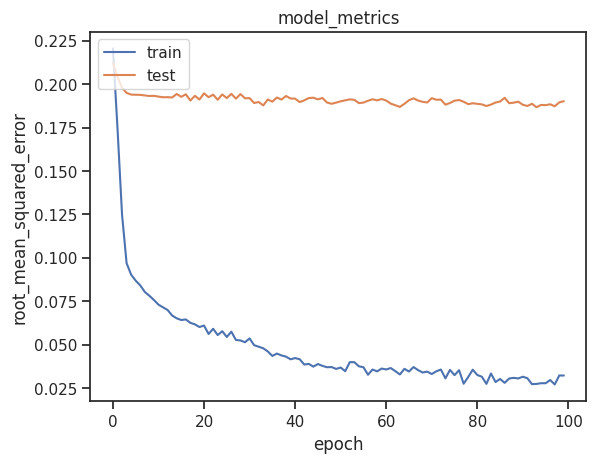

In [97]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi Porduk


In [108]:
cf_data = cf_data

user_id = df.user_id.sample(1).iloc[0]
product_bought_by_user = df[df.user_id == user_id]

product_not_bought = df[~df['product_id'].isin(product_bought_by_user.product_id.values)]['product_id']
product_not_bought = list(
    set(product_not_bought)
    .intersection(set(product_to_product_encoded.keys()))
)

product_not_bought = [[product_to_product_encoded.get(x)] for x in product_not_bought]
user_encoder = user_to_user_encoded.get(user_id)
user_product_array = np.hstack(
    ([[user_encoder]] * len(product_not_bought ), product_not_bought)
)
user_product_array

array([[  43, 1188],
       [  43, 1029],
       [  43,  403],
       ...,
       [  43,   63],
       [  43,  484],
       [  43,  981]])

In [111]:
ratings = model.predict(user_product_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_product_ids = [
    product_encoded_to_product.get(product_not_bought[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Product with high ratings from user')
print('----' * 8)

top_product_user = (
    product_bought_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .product_id.values
)

product_df_rows = cf_data[cf_data['product_id'].isin(top_product_user)]
for row in product_df_rows.itertuples():
    print(row.product_name, ':', row.category, 'with rating', row.rating)

print('----' * 8)
print('Top 10 product recommendation')
print('----' * 8)

recommended_product = cf_data[cf_data['product_id'].isin(recommended_product_ids)]
recommended_product[['product_name', 'category', 'sub_category', 'rating']]
# for row in recommended_product.itertuples():
    # print(row.product_id, ':', row.category, 'with rating', row.rating)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for users: AHDFR3PDKEBV72HXRL3RJJLS3YYA,AHYUZ2BLKNN6UJLFYWCXCEFZTOVQ,AHBST4ZJ5665DV2TCR4W4J2OI3DA,AGHPOFCHZ73Q2Q2IFTCJLUSEL2NQ,AHOMYGLSLJLCOT7Z24PZSVJY3LJQ,AESJE2EZD7S7WOYBN7RE7ZF3J2MA,AF23GXF525XSMXPJBEHP4SPKOZNQ,AFX5NHAAOUKKENAT6GWNKY3X5YTQ
Product with high ratings from user
--------------------------------
TP-Link AC600 600 Mbps WiFi Wireless Network USB Adapter for Desktop PC with 2.4GHz/5GHz High Gain Dual Band 5dBi Antenna Wi-Fi, Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.15 and earlier (Archer T2U Plus) : Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters with rating 4.4
TP-LINK AC1300 Archer T3U Plus High Gain USB 3.0 Wi-Fi Dongle, Wireless Dual Band MU-MIMO WiFi Adapter with High Gain Antenna, Supports Windows 11/10/8.1/8/7/XP/MacOS : Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters with rating 4.4
TP-Link AC600 600 Mbps WiFi Wireless Network USB Adapter for De

product_name  \
135                                                                                                                             LG 108 cm (43 inches) 4K Ultra HD Smart LED TV 43UQ7500PSF (Ceramic Black)   
332                                                                                                                     MI 138.8 cm (55 inches) 5X Series 4K Ultra HD LED Smart Android TV L55M6-ES (Grey)   
355                                      MI 10000mAh Lithium Ion, Lithium Polymer Power Bank Pocket Pro with 22.5 Watt Fast Charging, Dual Input Ports(Micro-USB and Type C), Triple Output Ports, (Black)   
554                                                                    Redmi Note 11 (Horizon Blue, 6GB RAM, 64GB Storage)|90Hz FHD+ AMOLED Display | Qualcomm® Snapdragon™ 680-6nm | 33W Charger Included   
712                                                               Zebronics ZEB-COUNTY 3W Wireless Bluetooth Portable Speaker With Supporting Carry Handle, USB, SD Card, AUX, FM & Call Function. (Green)   
753                                      Infinity (JBL Fuze Pint, Wireless Ultra Portable Mini Speaker with Mic, Deep Bass, Dual Equalizer, Bluetooth 5.0 with Voice Assistant Support for Mobiles (Black)   
865   Fire-Boltt Ring Pro Bluetooth Calling, 1.75” 320*385px High Res, IP68 & SpO2 Monitoring, Pin Code Locking Functionality & Split Screen Access, Built in Mic & Speaker for HD Calls, Black, Free Size   
958                                                                                                 HP Deskjet 2723 AIO Printer, Copy, Scan, WiFi, Bluetooth, USB, Simple Setup Smart App, Ideal for Home.   
1398                                                                                              AGARO Royal Double Layered Kettle, 1.5 Litres, Double Layered Cool Touch , Dry Boiling Protection, Black   
1448                                                                                                                                  IKEA Milk Frother for Your Milk, Coffee,(Cold and hot Drinks), Black   

                                                                                                   category  \
135                                           Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
332                                           Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
355                                   Electronics|Mobiles&Accessories|MobileAccessories|Chargers|PowerBanks   
554                                    Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones   
712                                                        Electronics|HomeAudio|Speakers|BluetoothSpeakers   
753                                                          Electronics|HomeAudio|Speakers|OutdoorSpeakers   
865                                                             Electronics|WearableTechnology|SmartWatches   
958                                                Computers&Accessories|Printers,Inks&Accessories|Printers   
1398  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Kettles&HotWaterDispensers|ElectricKettles   
1448                                   Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|MilkFrothers   

           sub_category  rating  
135    SmartTelevisions     4.3  
332    SmartTelevisions     4.3  
355          PowerBanks     4.3  
554         Smartphones     4.1  
712   BluetoothSpeakers     3.9  
753     OutdoorSpeakers     4.1  
865        SmartWatches     4.0  
958            Printers     3.6  
1398    ElectricKettles     4.3  
1448       MilkFrothers     3.6

## **Sistem Rekomendasi Model Hybrid**

Fungsi di bawah ini, kita akan membuat **sistem rekomendasi hybrid** dengan menggabungkan ***content-based filtering*** dan ***collaborative filtering***. Pertama, Identifikasi produk serupa untuk setiap id_produk dengan menggunakan *content-based filtering* dengan menggunakan TF-IDF vectorization dari fitur produk untuk menghitung skor *cosine similarity* dengan produk lain. Bagian sistem ini mengenali produk dengan fitur yang serupa. Lalu gunakan *collaborative filtering* dengan menguji rating produk target dan mencari produk lain dengan rating serupa, mengasumsikan produk dengan rating serupa mungkin cocok dengan preferensi user.

In [112]:
def hybrid_recommendation(product_id, content_sim_matrix, products, top_n=10):

    #Content-based filtering
    content_recommendations_idx = cbf_product_recommendations(product_id, similarity_data=content_sim_matrix, items=products, top_n = top_n)

    #Combine content and collaborative recommendations
    #Get indices for collaborative recommendations
    collaborative_recommendations_idx = recommended_product_ids
    # print(collaborative_recommendations_idx)
    #Map indices to product IDs
    collaborative_recommendations_idx = [products.index[products['product_id'] == pid].tolist()[0] for pid in collaborative_recommendations_idx]

    #Combine indices from both methods and remove duplicates
    combined_indices = list(set(content_recommendations_idx + collaborative_recommendations_idx))

    #Get recommended products details
    recommended_products = products.iloc[combined_indices].copy()
    recommended_products = recommended_products[['product_id', 'product_name','category', 'sub_category', 'rating']]

    return recommended_products

In [113]:
sample_product_id = cf_data['product_id'][0]
sample_product_name = cf_data['product_name'][0]
recommended_products = hybrid_recommendation(sample_product_id, cosine_sim, cf_data)
print("Recommendation for user who purchased product \"" + sample_product_name + "\"")
recommended_products.head(10)

Recommendation for user who purchased product "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)"


product_id  \
135   B0B3XY5YT4   
166   B07JPJJZ2H   
1451  B0187F2IOK   
42    B07JW1Y6XV   
556   B078G6ZF5Z   
960   B09MKG4ZCM   
714   B08DPLCM6T   
334   B0BF57RN3K   
78    B0B2DJDCPX   
80    B07LGT55SJ   

                                                                                                                                                                                                              product_name  \
135                                                                                                                                             LG 108 cm (43 inches) 4K Ultra HD Smart LED TV 43UQ7500PSF (Ceramic Black)   
166                                                                     Wayona Nylon Braided Lightning USB Data Sync & 3A Charging Cable for iPhones, iPad Air, iPad Mini, iPod Nano and iPod Touch (3 FT Pack of 1, Grey)   
1451                                                                                                                                                                           Bajaj HM-01 Powerful 250W Hand Mixer, Black   
42                                                                                                Wayona Nylon Braided 3A Lightning to USB A Syncing and Fast Charging Data Cable for iPhone, Ipad (3 FT Pack of 1, Black)   
556   Oraimo 18W USB & Type-C Dual Output Super Fast Charger Wall Adapter PE2.0&Quick Charge 3.0 & Power Delivery 3.0 Compatible for iPhone 13/13 Mini/13 Pro Max/12/12 Pro Max, iPad Mini/Pro, Pixel, Galaxy, Airpods Pro   
960               Xiaomi Mi 4A Dual_Band Ethernet 1200Mbps Speed Router| 2.4GHz & 5GHz Frequency|128MB RAM | DualCore 4 Thread CPU|4 Omni Directional Antenna|Mi Wi-Fi app-Parental Control & Anti Hacking|Repeater, White   
714                                                                                                                                                LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)   
334                                                              Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution   
78                                                             SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)   
80                                                                                                                              Wayona Usb Nylon Braided Data Sync And Charging Cable For Iphone, Ipad Tablet (Red, Black)   

                                                                               category  \
135                       Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
166   Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1451              Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandMixers   
42    Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
556             Electronics|Mobiles&Accessories|MobileAccessories|Chargers|WallChargers   
960                                     Computers&Accessories|NetworkingDevices|Routers   
714                       Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
334                                         Electronics|WearableTechnology|SmartWatches   
78    Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
80    Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   

          sub_category  rating  
135   SmartTelevisions     4.3  
166          USBCables     4.2  
1451        HandMixers     4.4  
42           USBCables     4.2  
556       WallChargers     4.0  
960            Routers     4.0  
714   SmartTelevisions     4.3  
334       SmartWatches     4.2  
78           USBCables     3.9  
80        